<a href="https://colab.research.google.com/github/DataKunal/SUPER_STORE_SALES_DASHBOARD/blob/main/indian_premier_league_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrise

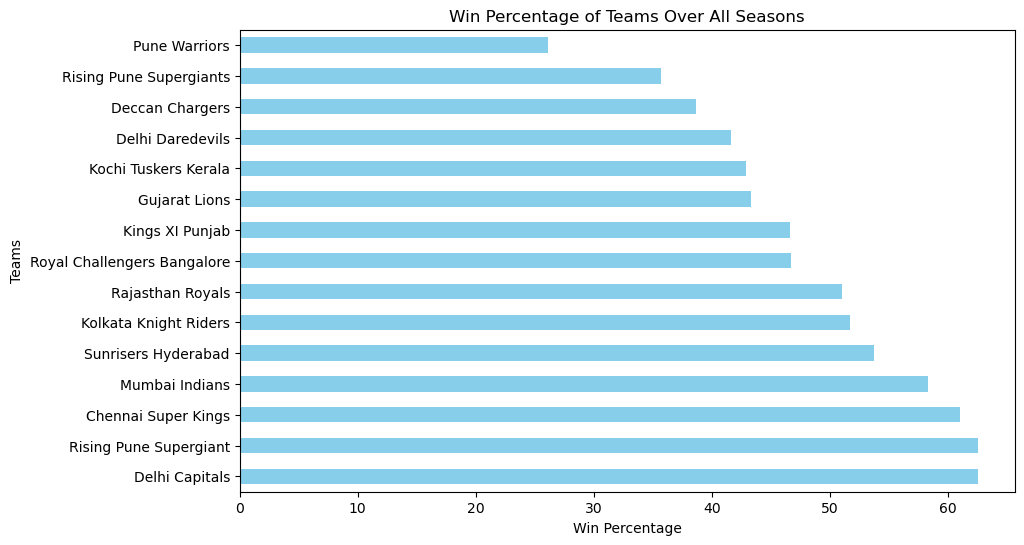


Average Winning Margin - Runs: 13.28, Wickets: 3.35

Most Successful Captain based on Toss Wins: ('Chennai Super Kings', 'Chennai Super Kings')

Top 3 Cities with Most Tied Matches:
city
Rajkot       1
Cape Town    1
Chennai      1
Name: count, dtype: int64

Season with Closest Matches: 2008

Most Consistent Batsman: V Kohli

Top 5 Batsmen with Most Boundaries:
batsman
CH Gayle     703
SK Raina     690
V Kohli      673
DA Warner    640
RG Sharma    625
Name: count, dtype: int64

Strike Rate in Powerplay:
batsman
A Ashish Reddy    0.008839
A Chopra          0.047732
A Flintoff        0.024750
A Hales           0.208606
A Mishra          0.001768
                    ...   
YV Takawale       0.213909
Yashpal Singh     0.030053
Younis Khan       0.005304
Yuvraj Singh      0.341194
Z Khan            0.000000
Name: batsman_runs, Length: 278, dtype: float64

Strike Rate in Death Overs:
batsman
A Ashish Reddy    0.529703
A Chandila        0.009901
A Chopra          0.002475
A Choudhary       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data
try:
    # Load Matches dataset
    matches = pd.read_csv(r"C:\Users\kunal\OneDrive\Documents\Indian_Premier_League[1]\matches.csv")
    # Load Deliveries dataset
    deliveries = pd.read_csv(r"C:\Users\kunal\OneDrive\Documents\Indian_Premier_League[1]\deliveries.csv")
except FileNotFoundError as e:
    print(f"File not found: {e}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Inspect the first few rows of each dataset
print("Matches Dataset:")
print(matches.head())
print("\nDeliveries Dataset:")
print(deliveries.head())

# Data Cleaning
# Check for null values
print("\nNull Values in Matches Dataset:")
print(matches.isnull().sum())

print("\nNull Values in Deliveries Dataset:")
print(deliveries.isnull().sum())

# Drop irrelevant columns if they exist
if 'umpire3' in matches.columns:
    matches = matches.drop(['umpire3'], axis=1)

# Inspect data types
print("\nMatches Data Types:")
print(matches.info())

print("\nDeliveries Data Types:")
print(deliveries.info())

# Merge datasets based on match_id
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id', how='inner')

# Inspect the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

print("\nNull Values in Merged Dataset:")
print(merged_data.isnull().sum())

# Match-Level Analysis
# Q1: Win Percentage of Each Team
team_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
team_wins = matches['winner'].value_counts()
win_percentage = (team_wins / team_matches) * 100
print("\nWin Percentage of Each Team:")
print(win_percentage)
plt.figure(figsize=(10, 6))
win_percentage.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Win Percentage of Teams Over All Seasons')
plt.xlabel('Win Percentage')
plt.ylabel('Teams')
plt.show()

# Q2: Highest Winning Margins (Runs and Wickets)
avg_win_runs = matches['win_by_runs'].mean()
avg_win_wickets = matches['win_by_wickets'].mean()
print(f"\nAverage Winning Margin - Runs: {avg_win_runs:.2f}, Wickets: {avg_win_wickets:.2f}")

# Q3: Most Successful Captain
most_wins_by_captain = matches.groupby('toss_winner')['winner'].value_counts().idxmax()
print(f"\nMost Successful Captain based on Toss Wins: {most_wins_by_captain}")

# Q4: Top 3 Cities with Most Tied Matches
tied_matches = matches[matches['result'] == 'tie']['city'].value_counts().head(3)
print("\nTop 3 Cities with Most Tied Matches:")
print(tied_matches)

# Q5: Season with Closest Matches (Smallest Winning Margins)
matches['winning_margin'] = matches[['win_by_runs', 'win_by_wickets']].min(axis=1)
avg_margin_per_season = matches.groupby('season')['winning_margin'].mean().idxmin()
print(f"\nSeason with Closest Matches: {avg_margin_per_season}")

# Ball-Level Analysis
# Q6: Most Consistent Batsman
batsman_avg_runs = merged_data.groupby('batsman')['batsman_runs'].sum() / merged_data['match_id'].nunique()
consistent_batsman = batsman_avg_runs.idxmax()
print(f"\nMost Consistent Batsman: {consistent_batsman}")

# Q7: Top 5 Batsmen with Most Boundaries
boundaries = merged_data[merged_data['batsman_runs'].isin([4, 6])]
top_batsmen_boundaries = boundaries['batsman'].value_counts().head(5)
print("\nTop 5 Batsmen with Most Boundaries:")
print(top_batsmen_boundaries)

# Q8: Strike Rate in Powerplay and Death Overs
powerplay = merged_data[(merged_data['over'] >= 1) & (merged_data['over'] <= 6)]
death_overs = merged_data[(merged_data['over'] >= 16) & (merged_data['over'] <= 20)]
strike_rate_powerplay = (powerplay.groupby('batsman')['batsman_runs'].sum() / powerplay['ball'].count()) * 100
strike_rate_death = (death_overs.groupby('batsman')['batsman_runs'].sum() / death_overs['ball'].count()) * 100
print("\nStrike Rate in Powerplay:")
print(strike_rate_powerplay)
print("\nStrike Rate in Death Overs:")
print(strike_rate_death)


